# Dependencies

In [1]:
import pandas

import re

import matplotlib.pyplot as pyplot

import sklearn.model_selection as model_selection

# Data

Data exploration, visualization, transformation and selection.

In [2]:
data = pandas.read_csv(
    './data/airbnb.csv',
    usecols=[
        'number_of_reviews',
        'review_scores_rating',
        'review_scores_location',
        'review_scores_value',
        'price'
    ],
    converters={
        "price": lambda value: float(re.sub(r'[^\d\-.]', '', value))
    },
)

In [3]:
data.dropna(how='any', inplace=True)

In [4]:
data.drop(data[data.price <= 0].index, inplace=True)

In [5]:
data.head()

,price,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value
0,350.0,267,4.68,4.76,4.66
1,296.0,85,4.73,4.97,4.58
2,387.0,238,4.68,4.81,4.56
3,172.0,181,4.72,4.90,4.65
4,260.0,378,4.89,4.94,4.87


In [6]:
data.describe()

,price,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value
count,15211.000000,15211.000000,15211.000000,15211.000000,15211.000000
mean,771.528894,23.374006,4.733110,4.852288,4.649721
std,2842.444393,40.784248,0.496865,0.379563,0.503628
min,33.000000,1.000000,0.000000,1.000000,1.000000
25%,230.000000,2.000000,4.670000,4.860000,4.540000
50%,415.000000,7.000000,4.890000,5.000000,4.770000
75%,762.000000,25.000000,5.000000,5.000000,5.000000
max,129080.000000,504.000000,5.000000,5.000000,5.000000


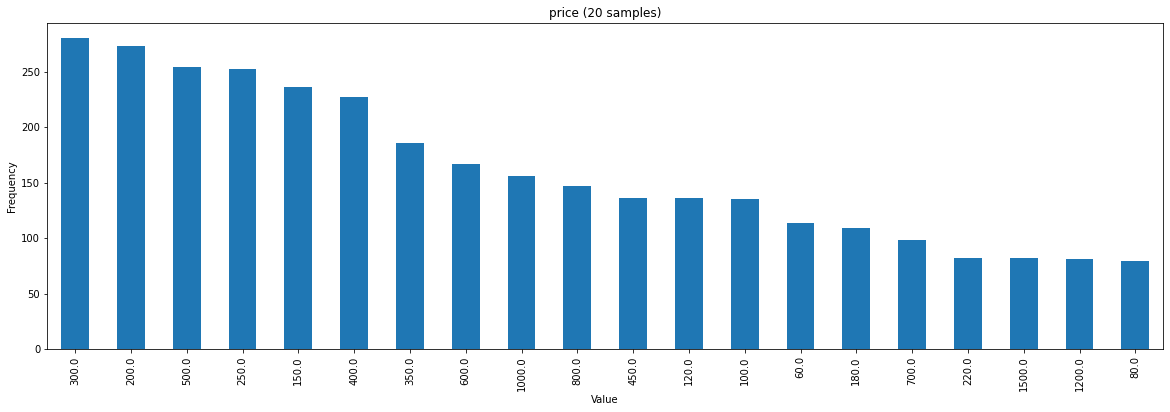

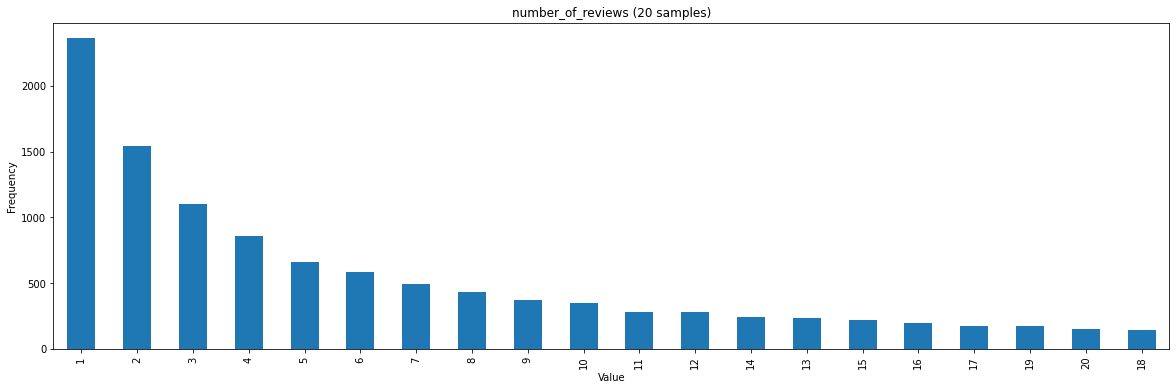

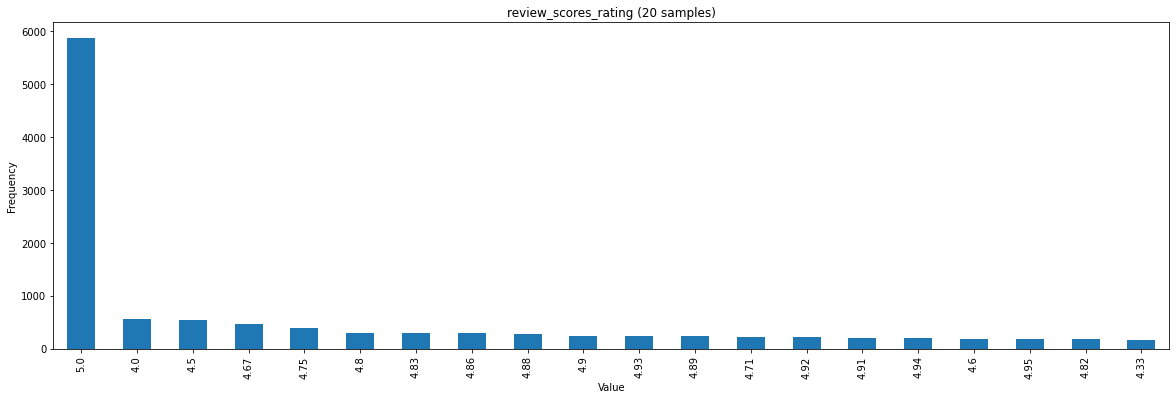

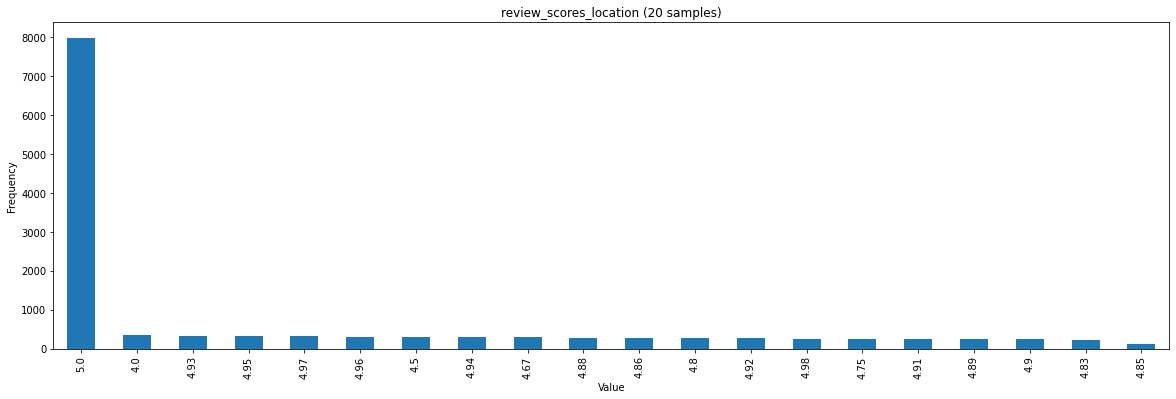

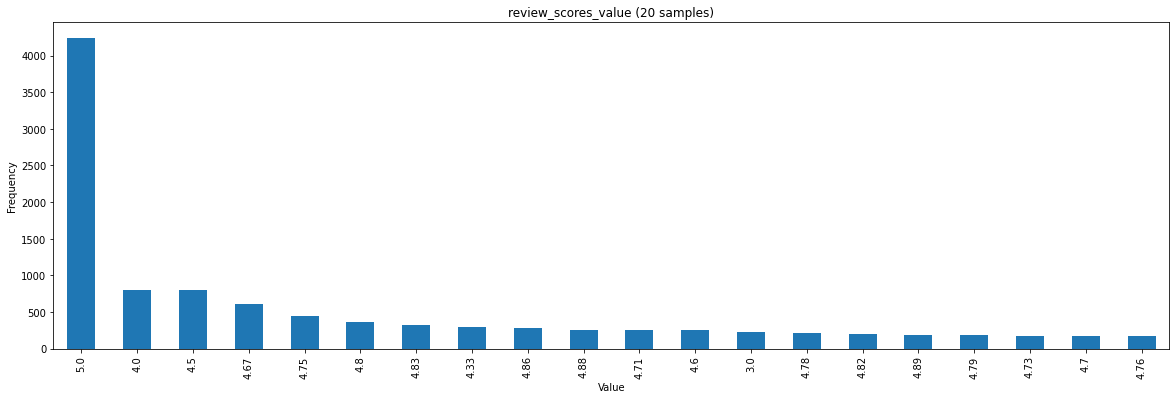

In [7]:
for column in data.columns:
    data[column].value_counts().iloc[:20].plot(title=f'{column} (20 samples)', kind='bar', xlabel='Value', ylabel='Frequency', figsize=(20,6))

    pyplot.show()

In [8]:
train, labels = data.drop('price', axis=1), data.price

In [9]:
x, x_test, y, y_test = model_selection.train_test_split(train, labels, test_size=0.2, train_size=0.8)